# Predicting Unknown Values (Notebook 4 of 4) 

In [1]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import xgboost as xgb

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Prerequistites

!pip install scikit-learn xgboost

In [3]:
# Import the data
data = pd.read_csv('../2_cleaned_data/d_merged_with_labels.csv')
data

,osm_id,ncc_owned,osm_way_id,house_area,house_peri,house_vert,private,house_lati,NATIONALCA,land_area,land_perim,land_verti,land_longi,land_latit,COUNT,house_long,b2lpercent,building_age
0,35551462,1,35551462,66,34,8,yes,6.971754e+06,29324493.0,207.0,62.0,12.0,-128367.6972,6.971752e+06,1,-128372.04,32.0,NaN
1,43078229,0,43078229,70,34,4,no,6.972089e+06,29416618.0,1261.0,151.0,36.0,-127157.2719,6.972083e+06,1,-127167.64,6.0,NaN
2,43078229,0,43078229,70,34,4,no,6.972089e+06,29416618.0,1261.0,151.0,36.0,-127157.2719,6.972083e+06,1,-127167.64,6.0,NaN
3,43078229,0,43078229,70,34,4,no,6.972089e+06,29416618.0,1261.0,151.0,36.0,-127157.2719,6.972083e+06,1,-127167.64,6.0,NaN
4,43078229,0,43078229,70,34,4,no,6.972089e+06,29416618.0,1261.0,151.0,36.0,-127157.2719,6.972083e+06,1,-127167.64,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1161677257,0,1161677257,57,31,4,no,6.972118e+06,29473181.0,249.0,68.0,11.0,-126524.4317,6.972113e+06,2,-126511.29,23.0,NaN
3422,1161677257,0,1161677257,57,31,4,no,6.972118e+06,29473181.0,249.0,68.0,11.0,-126524.4317,6.972113e+06,2,-126511.29,23.0,NaN
3423,1161677258,0,1161677258,52,30,4,no,6.972130e+06,61944023.0,160.0,71.0,11.0,-126531.5937,6.972125e+06,2,-126523.83,33.0,NaN
3424,1161677259,0,1161677259,50,30,4,no,6.972136e+06,61940774.0,161.0,72.0,9.0,-126538.1983,6.972131e+06,2,-126529.85,31.0,NaN


### Selecting data where 'building_age' is labelled

In [4]:
index=~data['building_age'].isna()

#Get index

labelled_data = data[index]

labelled_data

,osm_id,ncc_owned,osm_way_id,house_area,house_peri,house_vert,private,house_lati,NATIONALCA,land_area,land_perim,land_verti,land_longi,land_latit,COUNT,house_long,b2lpercent,building_age
37,61738758,0,61738758,61,38,8,no,6.971471e+06,29393419.0,69.0,41.0,12.0,-127468.5196,6.971467e+06,2,-127469.97,88.0,modern
88,61738934,0,61738934,53,31,8,no,6.971390e+06,29403117.0,127.0,50.0,12.0,-127334.2561,6.971393e+06,2,-127334.47,42.0,modern
89,61738936,0,61738936,83,39,4,no,6.971303e+06,29399689.0,282.0,78.0,25.0,-127391.7110,6.971309e+06,2,-127392.91,29.0,modern
97,61738958,0,61738958,40,32,6,no,6.972130e+06,29374681.0,102.0,60.0,14.0,-127724.8765,6.972138e+06,2,-127723.61,39.0,victorian
103,61738962,0,61738962,49,36,6,no,6.971576e+06,29370838.0,164.0,56.0,10.0,-127794.9319,6.971576e+06,1,-127789.88,30.0,victorian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,815821956,1,815821956,43,27,4,yes,6.972389e+06,60841217.0,189.0,69.0,17.0,-127254.7223,6.972392e+06,4,-127256.05,23.0,21st_century
3364,815821957,1,815821957,38,25,4,yes,6.972367e+06,60266631.0,126.0,58.0,14.0,-127237.5003,6.972368e+06,5,-127237.20,30.0,21st_century
3416,866781899,1,866781899,50,30,6,yes,6.972128e+06,61301033.0,133.0,55.0,17.0,-127108.9538,6.972127e+06,5,-127106.98,38.0,21st_century
3417,866781900,1,866781900,49,29,7,yes,6.972120e+06,61301008.0,137.0,51.0,12.0,-127100.5090,6.972118e+06,5,-127099.87,36.0,21st_century


# Data Preparation

In [5]:
# Encode building_age
encoder = LabelEncoder()
labelled_data['building_age_encoded'] = encoder.fit_transform(labelled_data['building_age'])

/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_94861/175375518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['building_age_encoded'] = encoder.fit_transform(labelled_data['building_age'])


In [6]:
features = ['land_area', 'ncc_owned', 'land_perim', 'land_verti', 'land_longi', 'land_latit', 'house_area', 'house_peri',
            'house_vert', 'house_long', 'house_lati', 'b2lpercent']

X = labelled_data[features]
y = labelled_data['building_age_encoded']  # Use the encoded column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the classifiers

In [7]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

lr_predictions = lr_classifier.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_error = 1 - lr_accuracy

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression Error: {lr_error:.4f}")

Logistic Regression Accuracy: 0.2167
Logistic Regression Error: 0.7833


In [8]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC())
]
stack_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_classifier.fit(X_train, y_train)

stack_predictions = stack_classifier.predict(X_test)

stack_accuracy = accuracy_score(y_test, stack_predictions)
stack_error = 1 - stack_accuracy

print(f"Stacked Generalization Accuracy: {stack_accuracy:.4f}")
print(f"Stacked Generalization Error: {stack_error:.4f}")

Stacked Generalization Accuracy: 0.9167
Stacked Generalization Error: 0.0833


/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_error = 1 - dt_accuracy

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Error: {dt_error:.4f}")

Decision Tree Accuracy: 0.7833
Decision Tree Error: 0.2167


In [10]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_error = 1 - rf_accuracy

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Error: {rf_error:.4f}")

Random Forest Accuracy: 0.9667
Random Forest Error: 0.0333


In [11]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

xgb_predictions = xgb_classifier.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_error = 1 - xgb_accuracy

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Error: {xgb_error:.4f}")

/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/luketaylor/anaconda3/envs/uf-ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:46:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy: 0.9833
XGBoost Error: 0.0167


# Predict unknown values

In [13]:
## Predict all unknown data using XGBoost
unknown = data[features]
prediction_num = xgb_classifier.predict(unknown)
unknown['predicted_buiding_age'] = encoder.inverse_transform(prediction_num)

/var/folders/jf/_h21nlf54hq6220nzhj98l7h0000gn/T/ipykernel_94861/1950648871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown['predicted_buiding_age'] = encoder.inverse_transform(prediction_num)


In [14]:
# View table

unknown

,land_area,ncc_owned,land_perim,land_verti,land_longi,land_latit,house_area,house_peri,house_vert,house_long,house_lati,b2lpercent,predicted_buiding_age
0,207.0,1,62.0,12.0,-128367.6972,6.971752e+06,66,34,8,-128372.04,6.971754e+06,32.0,victorian
1,1261.0,0,151.0,36.0,-127157.2719,6.972083e+06,70,34,4,-127167.64,6.972089e+06,6.0,modern
2,1261.0,0,151.0,36.0,-127157.2719,6.972083e+06,70,34,4,-127167.64,6.972089e+06,6.0,modern
3,1261.0,0,151.0,36.0,-127157.2719,6.972083e+06,70,34,4,-127167.64,6.972089e+06,6.0,modern
4,1261.0,0,151.0,36.0,-127157.2719,6.972083e+06,70,34,4,-127167.64,6.972089e+06,6.0,modern
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,249.0,0,68.0,11.0,-126524.4317,6.972113e+06,57,31,4,-126511.29,6.972118e+06,23.0,modern
3422,249.0,0,68.0,11.0,-126524.4317,6.972113e+06,57,31,4,-126511.29,6.972118e+06,23.0,modern
3423,160.0,0,71.0,11.0,-126531.5937,6.972125e+06,52,30,4,-126523.83,6.972130e+06,33.0,21st_century
3424,161.0,0,72.0,9.0,-126538.1983,6.972131e+06,50,30,4,-126529.85,6.972136e+06,31.0,21st_century


In [15]:
# Update the table for export to felt.com mapping

# Create a copy
unknown_copy = unknown.copy()

#Rename columns
unknown_copy.rename(columns={'ncc_owned': 'Council Owned'}, inplace=True)
unknown_copy.rename(columns={'land_area': 'Land Area(sqm)'}, inplace=True)
unknown_copy.rename(columns={'land_perim': 'Land Perimeter(m)'}, inplace=True)
unknown_copy.rename(columns={'land_verti': 'Land No. of Corners'}, inplace=True)
unknown_copy.rename(columns={'land_longi': 'Land Longitude'}, inplace=True)
unknown_copy.rename(columns={'land_latit': 'Land Latitude'}, inplace=True)
unknown_copy.rename(columns={'house_area': 'House Area(sqm)'}, inplace=True)
unknown_copy.rename(columns={'house_peri': 'House Perimeter(m)'}, inplace=True)
unknown_copy.rename(columns={'house_vert': 'House No. of Corners'}, inplace=True)
unknown_copy.rename(columns={'house_long': 'Longitude'}, inplace=True)
unknown_copy.rename(columns={'house_lati': 'Latitude'}, inplace=True)
unknown_copy.rename(columns={'b2lpercent': 'Building to Land Ratio (%)'}, inplace=True)
unknown_copy.rename(columns={'predicted_buiding_age': 'Predicted Building Age'}, inplace=True)

#Rename values in Council Owned Column to yes / no
unknown_copy.rename(columns={'ncc_owned': 'Council Owned'}, inplace=True)
unknown_copy['Council Owned'] = unknown_copy['Council Owned'].map({1: 'Yes', 0: 'No'})

#Round percentage to a whole number
unknown_copy['Building to Land Ratio (%)'] = unknown_copy['Building to Land Ratio (%)'].round().astype(int)

#Remove columns
new_unknown = unknown_copy.drop(columns=['Land No. of Corners', 'Land Latitude','Land Longitude','House No. of Corners','House No. of Corners',])

#Re-order columns
reordered_columns = ['Council Owned', 'Predicted Building Age', 'Building to Land Ratio (%)','House Area(sqm)','House Perimeter(m)','Land Area(sqm)','Land Perimeter(m)','Longitude','Latitude']
new_unknown = new_unknown[reordered_columns]


In [16]:
# Replace predicted building age to new read friendly version

# Define a dictionary with old values as keys and new values as the corresponding values
replace_values = {
    "victorian": "Victorian (1837–1901)",
    "inter_war": "Inter-war (1918–1939)",
    "post_war": "Post-war (1945–1970s)",
    "modern": "Modern (1970s–2000)",
    "21st_century": "21st Century (2000–present)"
}

# Use the replace method on the specific column
new_unknown['Predicted Building Age'] = new_unknown['Predicted Building Age'].replace(replace_values)
new_unknown

,Council Owned,Predicted Building Age,Building to Land Ratio (%),House Area(sqm),House Perimeter(m),Land Area(sqm),Land Perimeter(m),Longitude,Latitude
0,Yes,Victorian (1837–1901),32,66,34,207.0,62.0,-128372.04,6.971754e+06
1,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
2,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
3,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
4,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
...,...,...,...,...,...,...,...,...,...
3421,No,Modern (1970s–2000),23,57,31,249.0,68.0,-126511.29,6.972118e+06
3422,No,Modern (1970s–2000),23,57,31,249.0,68.0,-126511.29,6.972118e+06
3423,No,21st Century (2000–present),33,52,30,160.0,71.0,-126523.83,6.972130e+06
3424,No,21st Century (2000–present),31,50,30,161.0,72.0,-126529.85,6.972136e+06


In [17]:
print(new_unknown.columns)

Index(['Council Owned', 'Predicted Building Age', 'Building to Land Ratio (%)',
       'House Area(sqm)', 'House Perimeter(m)', 'Land Area(sqm)',
       'Land Perimeter(m)', 'Longitude', 'Latitude'],
      dtype='object')


In [18]:
new_unknown

,Council Owned,Predicted Building Age,Building to Land Ratio (%),House Area(sqm),House Perimeter(m),Land Area(sqm),Land Perimeter(m),Longitude,Latitude
0,Yes,Victorian (1837–1901),32,66,34,207.0,62.0,-128372.04,6.971754e+06
1,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
2,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
3,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
4,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
...,...,...,...,...,...,...,...,...,...
3421,No,Modern (1970s–2000),23,57,31,249.0,68.0,-126511.29,6.972118e+06
3422,No,Modern (1970s–2000),23,57,31,249.0,68.0,-126511.29,6.972118e+06
3423,No,21st Century (2000–present),33,52,30,160.0,71.0,-126523.83,6.972130e+06
3424,No,21st Century (2000–present),31,50,30,161.0,72.0,-126529.85,6.972136e+06


In [19]:
# Get summary of predicted results

new_unknown

,Council Owned,Predicted Building Age,Building to Land Ratio (%),House Area(sqm),House Perimeter(m),Land Area(sqm),Land Perimeter(m),Longitude,Latitude
0,Yes,Victorian (1837–1901),32,66,34,207.0,62.0,-128372.04,6.971754e+06
1,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
2,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
3,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
4,No,Modern (1970s–2000),6,70,34,1261.0,151.0,-127167.64,6.972089e+06
...,...,...,...,...,...,...,...,...,...
3421,No,Modern (1970s–2000),23,57,31,249.0,68.0,-126511.29,6.972118e+06
3422,No,Modern (1970s–2000),23,57,31,249.0,68.0,-126511.29,6.972118e+06
3423,No,21st Century (2000–present),33,52,30,160.0,71.0,-126523.83,6.972130e+06
3424,No,21st Century (2000–present),31,50,30,161.0,72.0,-126529.85,6.972136e+06


In [20]:
# Export as .csv

new_unknown.to_csv('../5_predictions/meadows_with_predictions.csv', index=None)

In [21]:
value_counts = new_unknown['Predicted Building Age'].value_counts()
value_counts

Victorian (1837–1901)          1484
Post-war (1945–1970s)           792
Inter-war (1918–1939)           608
Modern (1970s–2000)             306
21st Century (2000–present)     236
Name: Predicted Building Age, dtype: int64

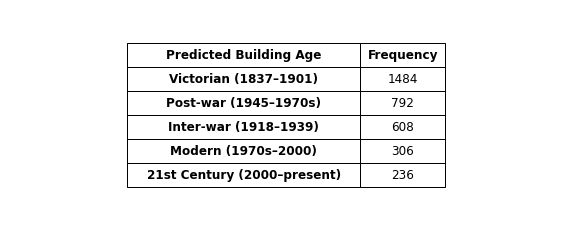

In [22]:
# Create a table
import matplotlib.pyplot as plt

# Given value_counts
value_counts = new_unknown['Predicted Building Age'].value_counts()

# Convert to DataFrame for better handling
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Predicted Building Age', 'Frequency']

# Create a new figure and set size
fig, ax = plt.subplots(figsize=(10, 4))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create Table and set its location
table = ax.table(cellText=value_counts_df.values, colLabels=value_counts_df.columns, cellLoc='center', loc='center')

# Make cells larger to fit text
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.0, 2.0)

# Make the column and first column titles bold
for (i, j), cell in table.get_celld().items():
    if i == 0 or j == 0:  # Changed this line to also bold the first column
        cell.set_text_props(fontweight='bold')

# Automatically adjust column widths
table.auto_set_column_width(col=list(range(len(value_counts_df.columns))))

# Save as a png file
plt.savefig("../4_results/predicted_building_age_table.png", bbox_inches='tight', pad_inches=0.03)

# Show the plot
plt.show()


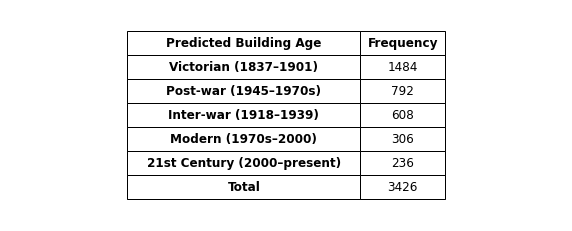

In [24]:
# Given value_counts
value_counts = new_unknown['Predicted Building Age'].value_counts()

# Convert to DataFrame for better handling
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Predicted Building Age', 'Frequency']

# Add a 'Total' row
total_row = pd.DataFrame({'Predicted Building Age': ['Total'], 'Frequency': [value_counts_df['Frequency'].sum()]})
value_counts_df = pd.concat([value_counts_df, total_row], ignore_index=True)

# Create a new figure and set size
fig, ax = plt.subplots(figsize=(10, 4))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create Table and set its location
table = ax.table(cellText=value_counts_df.values, colLabels=value_counts_df.columns, cellLoc='center', loc='center')

# Make cells larger to fit text
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.0, 2.0)

# Make the column and first column titles bold
for (i, j), cell in table.get_celld().items():
    if i == 0 or j == 0:  
        cell.set_text_props(fontweight='bold')

# Automatically adjust column widths
table.auto_set_column_width(col=list(range(len(value_counts_df.columns))))

# Save as a png file
plt.savefig("../4_results/predicted_building_age_table.png", bbox_inches='tight', pad_inches=0.03)

# Show the plot
plt.show()


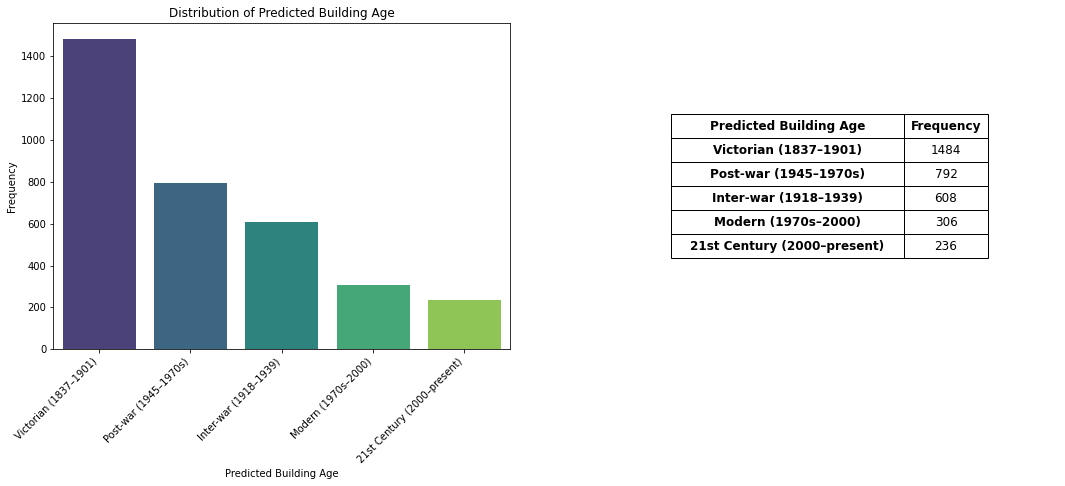

In [23]:
# Given value_counts
value_counts = new_unknown['Predicted Building Age'].value_counts()

# Convert to DataFrame for better handling
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Predicted Building Age', 'Frequency']

# Create a new figure and set size
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot with 'viridis' color scheme
sns.barplot(x='Predicted Building Age', y='Frequency', data=value_counts_df, ax=axs[0], palette='viridis')
axs[0].set_title('Distribution of Predicted Building Age')

# Rotate x-axis labels to prevent overlap
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Table
axs[1].axis('tight')
axs[1].axis('off')
table = axs[1].table(cellText=value_counts_df.values, colLabels=value_counts_df.columns, cellLoc='center', loc='center')

# Font and scaling settings
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.0, 2.0)

# Make the headers and first column bold
for (i, j), cell in table.get_celld().items():
    if i == 0 or j == 0:
        cell.set_text_props(fontweight='bold')

# Automatically adjust column widths
table.auto_set_column_width(col=list(range(len(value_counts_df.columns))))

plt.show()
